###### 2.フィッシャーのアヤメ


「フィッシャーのアヤメ」という機械学習やデータ分析の世界で有名なデータセットを使い、基本的なデータの扱い方を学んでいきます。

これはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータです。

Iris setosa - Wikipedia
Iris virgicolor - Wikipedia
Iris virginica - Wikipedia

setosa、virgiclor、virginicaはここで 目的変数 や ラベル と呼ばれるものに当たります。

1本ごとにsepal_length（がく片の長さ）, sepal_width（がく片の幅）, petal_length（花弁の長さ）, petal_width（花弁の幅）の4種類の情報が記録されています。この4種類を 特徴量 と呼びます。

# 3.データセットの準備


scikit-learnという機械学習ライブラリにはirisデータセットが用意されているため、これを使用します。

### 【問題1】データの取得
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。

sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation

データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。

pandas.DataFrame — pandas 0.24.2 documentation

X =

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
print(type(iris))

<class 'sklearn.utils.Bunch'>


In [2]:
X = pd.DataFrame(iris.data, columns=["sepal_lengt", "sepal_width", "petal_length", "petal_width"])

X.head()

,sepal_lengt,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
X.shape

(150, 4)

Y目的変数も同様にyに格納してください。

In [4]:
Y = pd.DataFrame(iris.target, columns=["Species"])
Y.head()

,Species
0,0
1,0
2,0
3,0
4,0


### 【問題2】データの結合
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

df =

In [5]:
df = pd.concat([X, Y],1)

df.head()

,sepal_lengt,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 4.データの概観


### 【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。

先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
ラベルごとのサンプル数の合計を出力する。
特徴量に欠損値があるかを確認する。
特徴量の平均値と標準偏差、四分位数を一度に表示させる。

DataFrameのメソッドである.head(),.info(),.describe(),.isnull(),.sum()や、Seriesのメソッドである.value_countsなどを使ってみましょう。

pandas.DataFrame.head — pandas 0.25.3 documentation

pandas.DataFrame.info — pandas 0.25.3 documentation

pandas.DataFrame.describe — pandas 0.25.3 documentation

pandas.DataFrame.isnull — pandas 0.25.3 documentation

pandas.DataFrame.sum — pandas 0.25.3 documentation

pandas.Series.value_counts — pandas 0.25.3 documentation

In [6]:
df.head(4)

,sepal_lengt,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [7]:
df.sum()

sepal_lengt     876.5
sepal_width     458.6
petal_length    563.7
petal_width     179.9
Species         150.0
dtype: float64

In [8]:
df.describe()

,sepal_lengt,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_lengt   150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [10]:
df.isnull()

,sepal_lengt,sepal_width,petal_length,petal_width,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [11]:
df.value_counts

<bound method DataFrame.value_counts of      sepal_lengt  sepal_width  petal_length  petal_width  Species
0            5.1          3.5           1.4          0.2        0
1            4.9          3.0           1.4          0.2        0
2            4.7          3.2           1.3          0.2        0
3            4.6          3.1           1.5          0.2        0
4            5.0          3.6           1.4          0.2        0
..           ...          ...           ...          ...      ...
145          6.7          3.0           5.2          2.3        2
146          6.3          2.5           5.0          1.9        2
147          6.5          3.0           5.2          2.0        2
148          6.2          3.4           5.4          2.3        2
149          5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

### 【問題4】irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

#### Iris setosa
茎は枝分かれしており、高さは非常に変化し、高さは10cmから1 m。
丸みを帯びた茎は、直径1.5〜9 cmで、1〜3本の枝があります。

iris setosaは中緑色の葉を持つ、葉は長さ30–60 cm、幅0.8–2.5cm

植物は茎あたり3〜4個の花を持ち、6月から7月に開花します。
大きな花は、幅が5〜8 c、通常は7〜8 cm、さまざまな青の色合いがあります。

#### Iris virginica
茎は時々枝分かれしていて、わずかにジグザグ、高さ30〜90 cm

2〜4枚の直立またはアーチ型の明るい緑色の槍形の葉があり、葉1~3cm

1本の直立した茎に2〜6本の花を持ち、4月から5月に開花します。

わずかに香りのよい花3枚の水平から成る。色は、濃い紫からピンクがかった白までさまざまです。

#### Iris versicolor
高さ10〜80 cm（4〜31インチ）で成長する顕花草本 多年生植物です。

葉は中肋で折りたたまれ、重なり合う平らな扇形を形成します。

よく発達した青い花には6枚の花びら。花は通常、淡い青から濃い青（5月から7月に咲きます。

# 5.特徴量についての探索


各特徴量や特徴量同士の関係を見ていきます。

### 【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。

sepal_widthの列を３つの異なる方法で抽出する
50番目から99番目までのデータを抽出する
petal_lengthの列の50番目から99番目までのデータを抽出する
petal_widthの値が0.2のデータを抽出する

.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。


In [12]:
df['sepal_width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [13]:
df.sepal_width

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [14]:
df.loc[:,['sepal_width']]

,sepal_width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


In [15]:
df.iloc[:,1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [16]:
df[50:100]

,sepal_lengt,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [17]:
df.loc[50:99,['petal_length']]

,petal_length
50,4.7
51,4.5
52,4.9
53,4.0
54,4.6
55,4.5
56,4.7
57,3.3
58,4.6
59,3.9


In [18]:
df[df.petal_width == 0.2]

,sepal_lengt,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


loc  はラベルで指定する、
iloc は行数列すうで指定してデータを取得する

### 【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。

ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
print(len(df['Species']))
setosa = df['Species'] == 0
versicolor = df['Species'] == 1
virginica = df['Species'] == 2
iris_list = [setosa.sum(),versicolor.sum(),virginica.sum()]
print(iris_list)

150
[50, 50, 50]


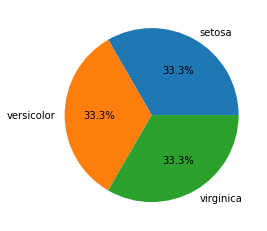

In [22]:
plt.pie(iris_list, labels=iris['target_names'], autopct='%.1f%%')
plt.show()

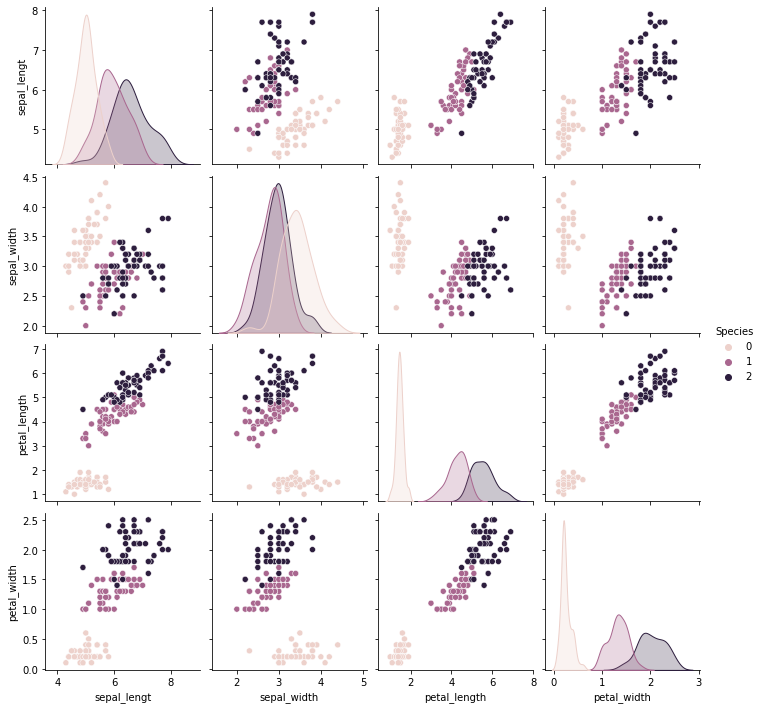

In [31]:
sns.pairplot(df, hue='Species')
plt.show()

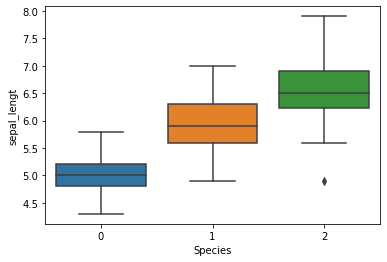

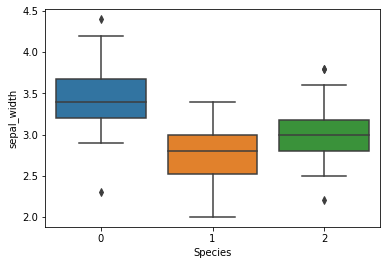

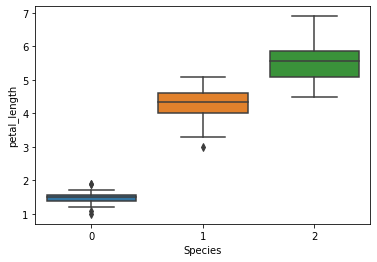

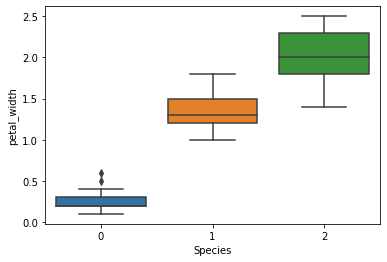

In [24]:
for i in range(4):
    sns.boxplot(x=df['Species'], y=df.iloc[:,i])
    plt.show()

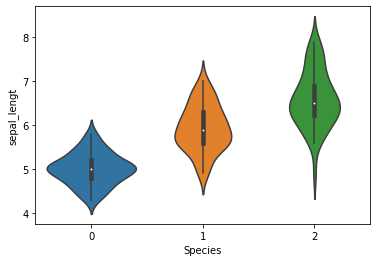

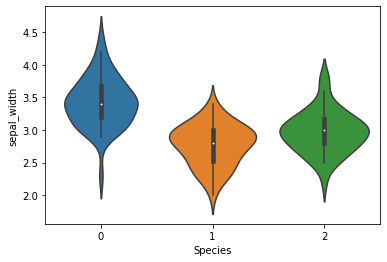

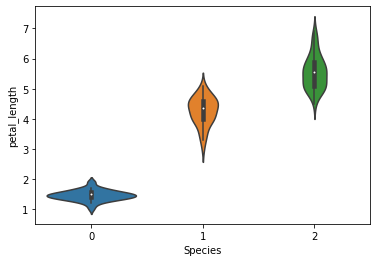

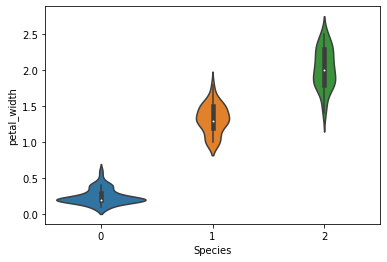

In [25]:
for i in range(4):
    sns.violinplot(x=df['Species'], y=df.iloc[:,i])
    plt.show()

In [26]:
箱ヒゲ図　
箱ひげ図とは，図のように「最大値・最小値・四分位数」の情報を表現したグラフです。箱ひげ図には平均値の情報が含まれることもあります。

箱ひげ図を見れば，データの分布を大雑把に把握することができます。

SyntaxError: invalid character in identifier (<ipython-input-26-cad35f680ece>, line 1)

バイオリン図
には箱ひげ図よりも多くの情報が含まれる。箱ひげ図には平均/中央値と四分位範囲という要約統計量のみが含まれるのに対し、バイオリンプロットにはすべての分布データが含まれる。これはデータ分布がmultimodal（複数のピークがある）場合に特に有用である。このような場合、バイオリン図では複数のピークの位置と大きさが明確に表現されるが、これは箱ひげ図では表現されない。バイオリン図の内部には平均（または中央値）と四分位範囲が描かれる。特にサンプル数があまり多くない場合には、すべてのサンプルデータが点や線として描かれる場合もある。

### 【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。

縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る(６つ)
全ての組み合わせの散布図を一度に表示させる、散布図行列を作る(１つ)
４つの特徴量に関する相関係数行列を作る
相関係数行列のヒートマップを作る(１つ)

相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。

pandas.DataFrame.corr — pandas 0.24.2 documentation


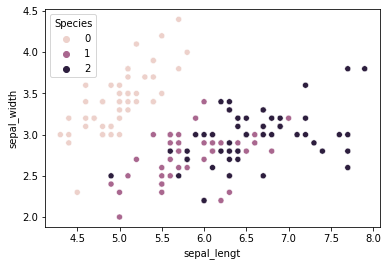

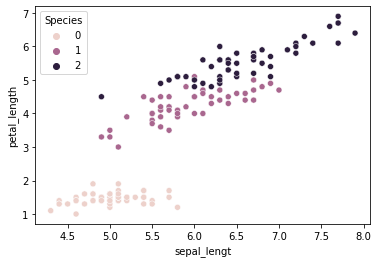

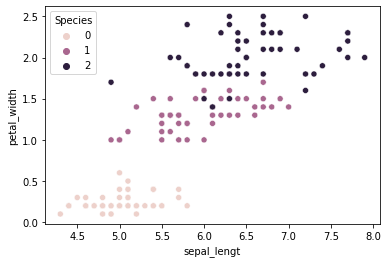

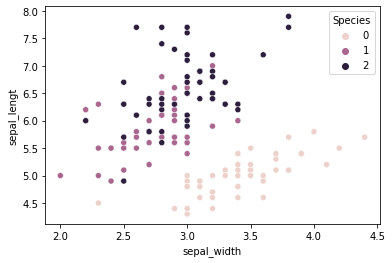

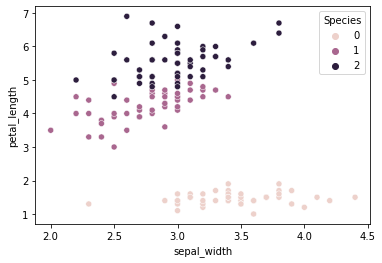

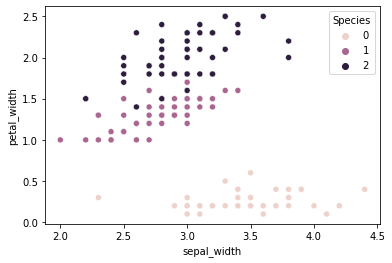

In [27]:
count = 0
for i in range(4):
    for j in range(4):
        if count == 6:
            break
        else:    
            if i == j:
                pass
            else:
                count +=1
                sns.scatterplot(x=df.iloc[:,i], y=df.iloc[:,j],hue=df['Species'],data=iris)
                plt.show()


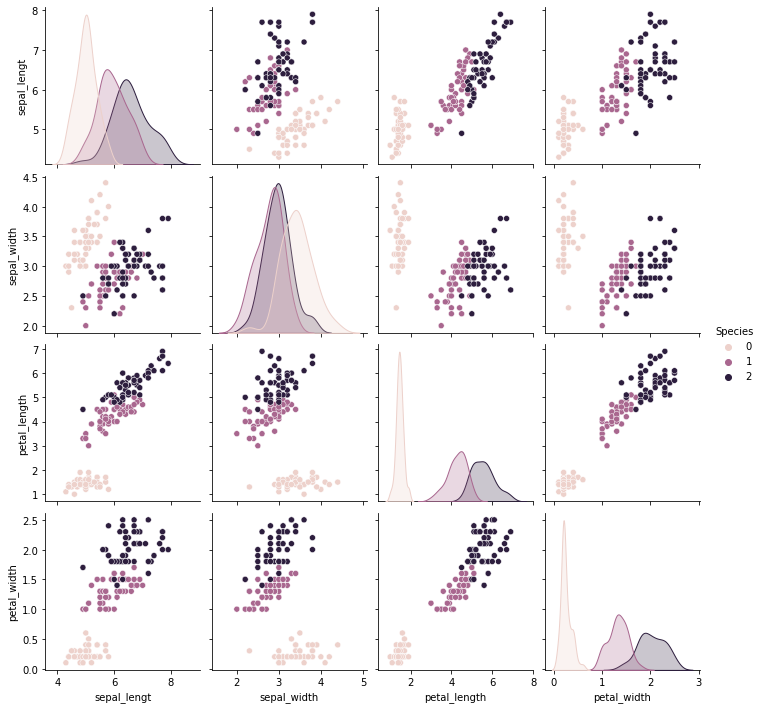

In [28]:
sns.pairplot(df, hue='Species')
plt.show()

In [29]:
corr_mat = df.iloc[:,:4].corr()
corr_mat

,sepal_lengt,sepal_width,petal_length,petal_width
sepal_lengt,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


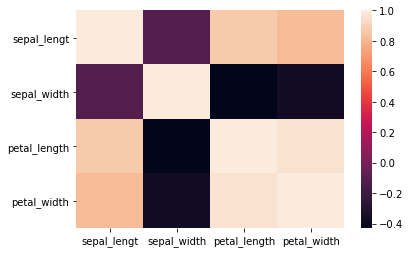

In [30]:
sns.heatmap(corr_mat)
plt.show()

### 【問題8】可視化したグラフや表の結果の説明
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。

例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

散布行列から
それぞれバラバラに値が散布されているため、品種が判別しやすい